# Climate data Exploratory Data Analysis

### INTRODUCTION

- This notebook consists of exploratory data analysis of climate data from 1900 to 2023. The datasets includes the information regarding global temperatures, CO2 concentration, sea level rise and artic ice area.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('data/Climate_Change_Indicators.csv')#reading the csv data using pandas
df.head() #displaying the first few rows of the datasets

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


### 1) Data Preparation 

In [8]:
print("Dataset Info : ")
print(df.info()) #it prints the infomation of the datasets
print("\nMissing Values:")
print(df.isnull().sum()) #this prints if the datasets has missing values if any

Dataset Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [10]:
dfagg=df.groupby("Year").mean() #calculate the yearwise mean/aggregate and group by year.
dfagg

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


### 2) Univariate Analysis


 stats for Global Average Temperature (°C):
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64
Median: 14.499496271190523


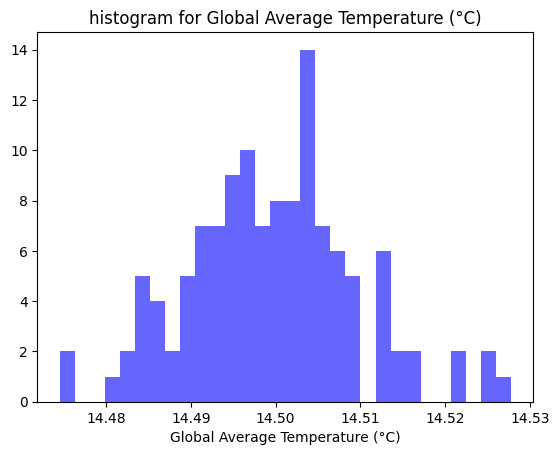

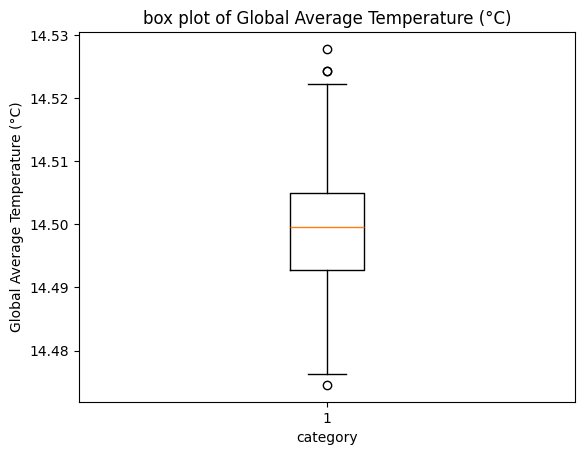

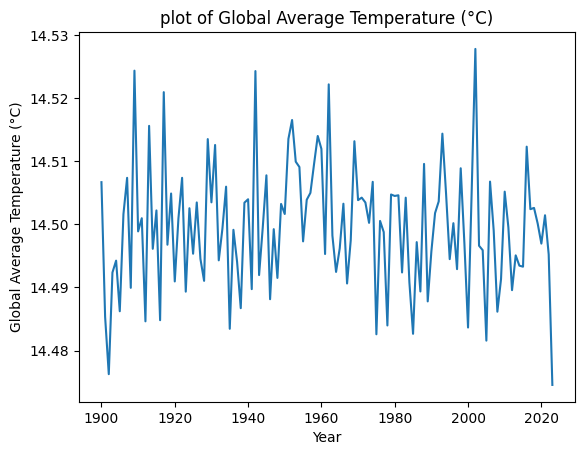

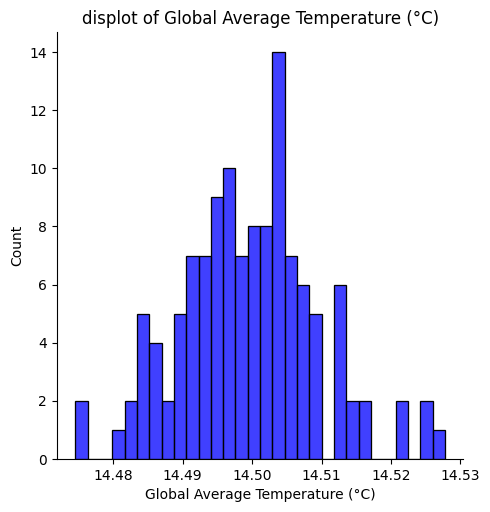

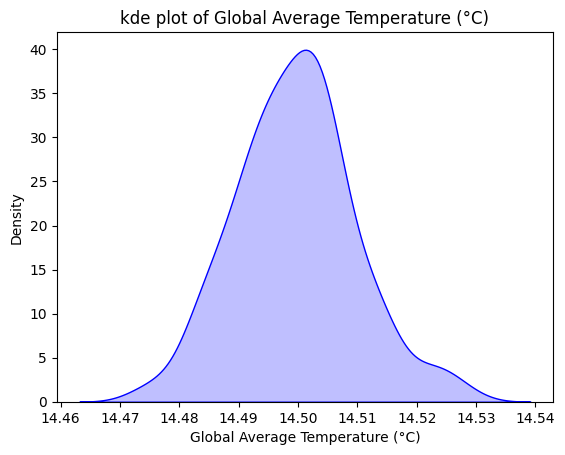


 stats for CO2 Concentration (ppm):
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64
Median: 350.02233369847306


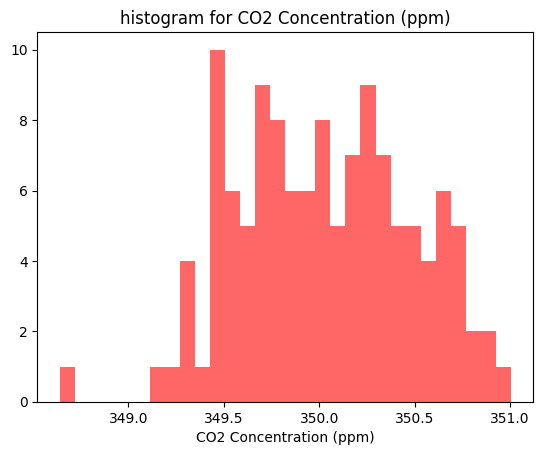

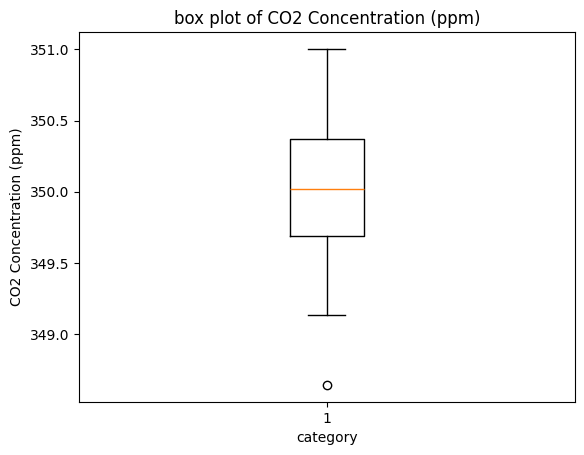

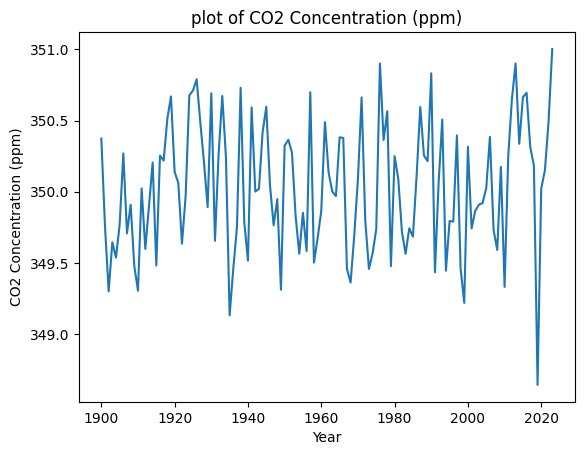

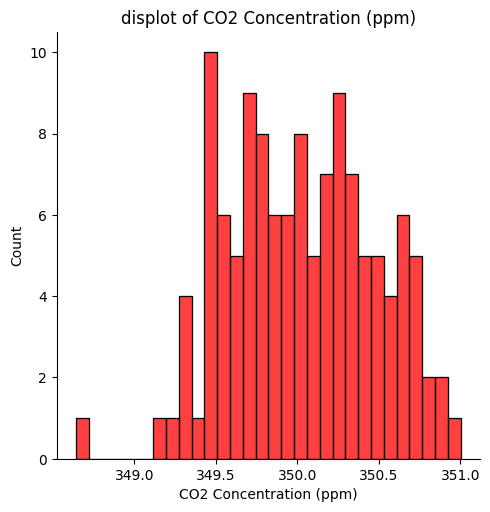

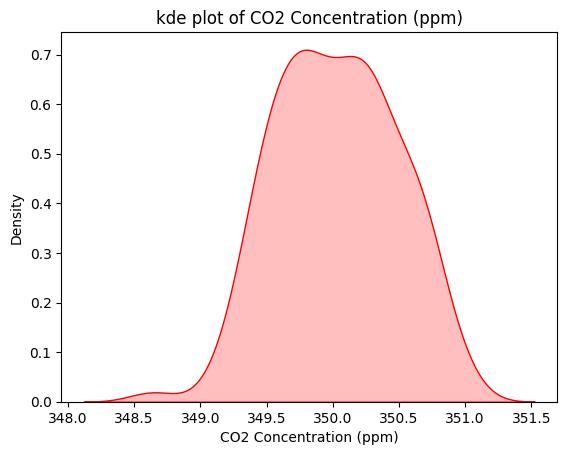


 stats for Sea Level Rise (mm):
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64
Median: 149.91806245822556


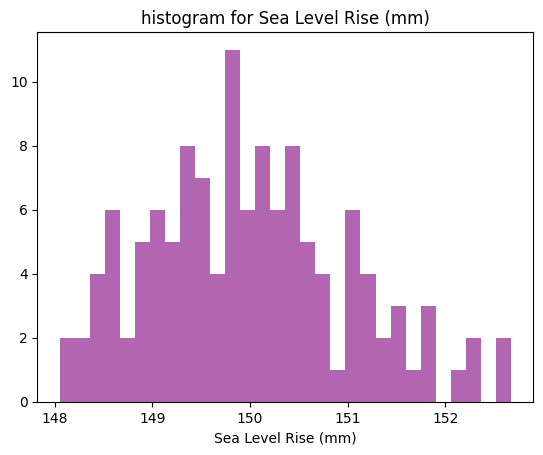

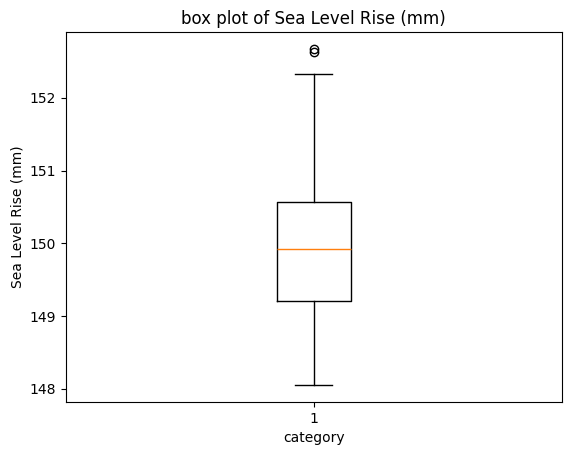

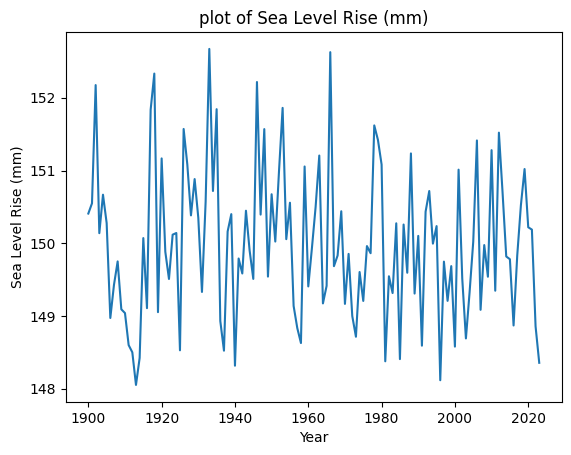

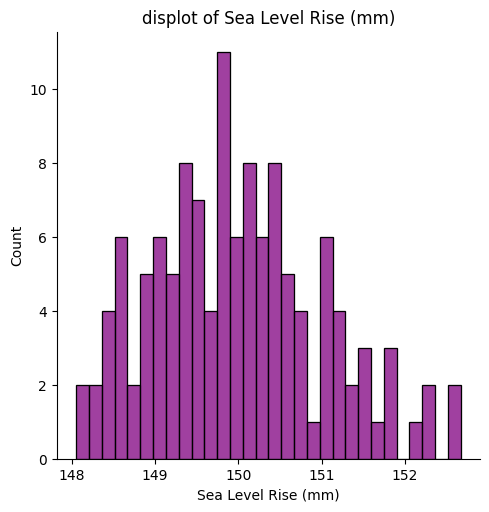

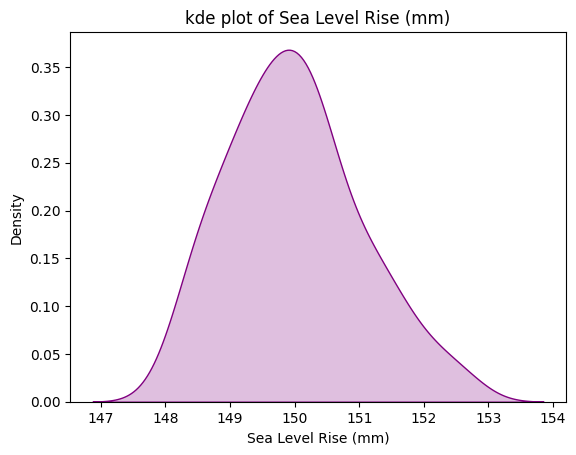


 stats for Arctic Ice Area (million km²):
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64
Median: 8.998274441362046


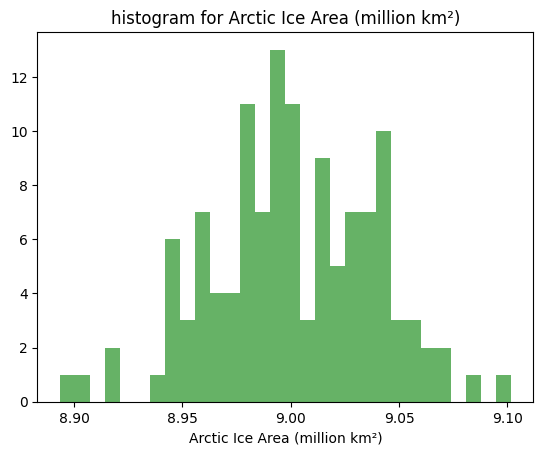

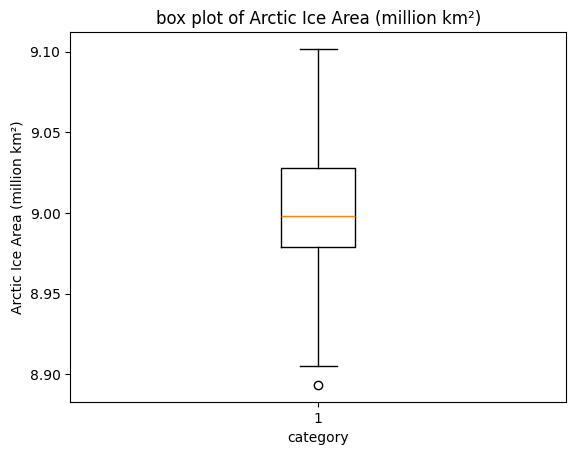

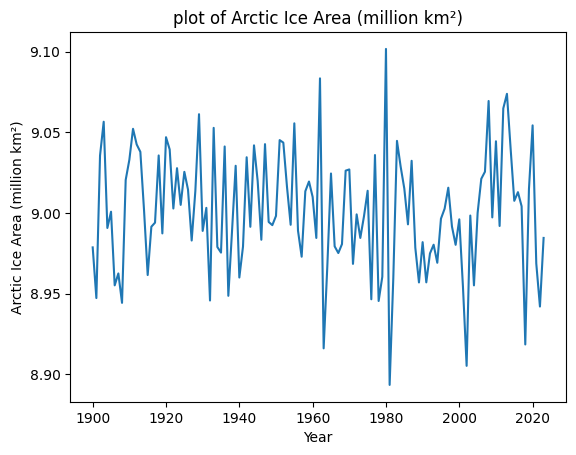

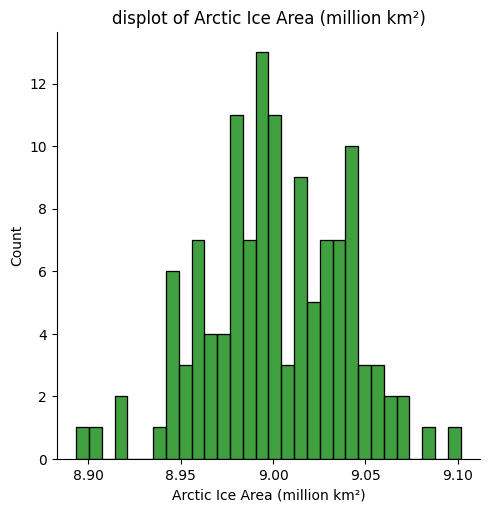

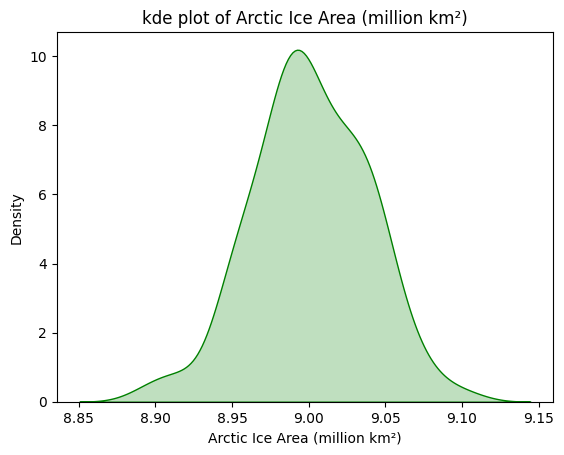

In [12]:
#using for loop to iterate various graph/plot generation of various climate variables
climate_variables=['Global Average Temperature (°C)','CO2 Concentration (ppm)','Sea Level Rise (mm)','Arctic Ice Area (million km²)']
color_name=['blue','red','purple','green']
for i, j in zip(climate_variables, color_name):
    print(f"\n stats for {i}:")
    print(dfagg[i].describe())
    print(f"Median: {dfagg[i].median()}")
    plt.hist(dfagg[i],bins=30,alpha=0.6,color=j)
    plt.xlabel(i)
    plt.title(f'histogram for {i}')
    plt.show()
    plt.boxplot(dfagg[i])
    plt.title(f'box plot of {i}')
    plt.xlabel('category')
    plt.ylabel(i)
    plt.show()
    plt.plot(dfagg[i])
    plt.xlabel('Year')
    plt.ylabel(i)
    plt.title(f'plot of {i}')
    plt.show()
    sns.displot(dfagg[i],bins=30,color=j)
    plt.title(f'displot of {i}')
    plt.show()
    sns.kdeplot(dfagg[i],fill=True,color=j)
    plt.title(f'kde plot of {i}')
    plt.show()
    

### 3) Bivariate analysis

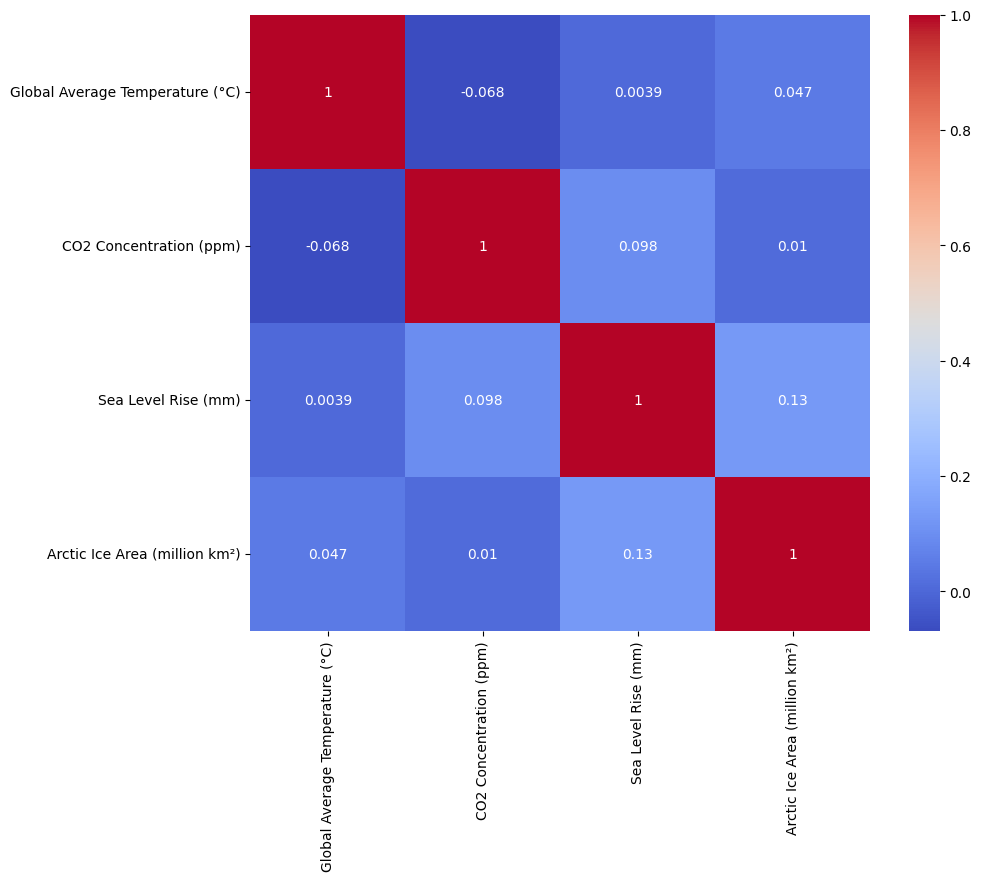

In [13]:
#HEATMAP FOR EACH OF THE CLIMATE VARIABLES CORRELATION
correlation_matrix=dfagg.corr()
correlation_matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

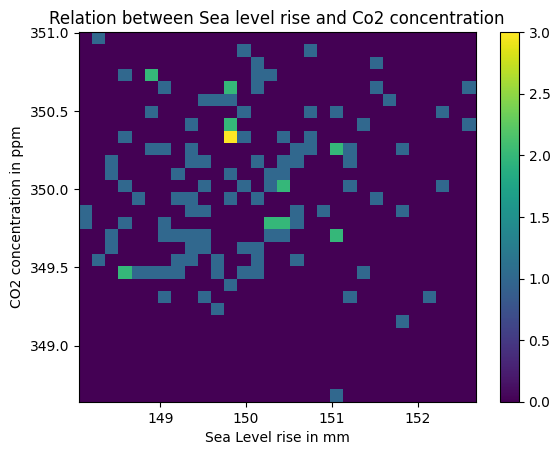

In [16]:
plt.hist2d(dfagg['Sea Level Rise (mm)'],dfagg['CO2 Concentration (ppm)'],bins=(30,30), cmap='viridis')
plt.colorbar()
plt.xlabel('Sea Level rise in mm')
plt.ylabel('CO2 concentration in ppm')
plt.title('Relation between Sea level rise and Co2 concentration')
plt.show()

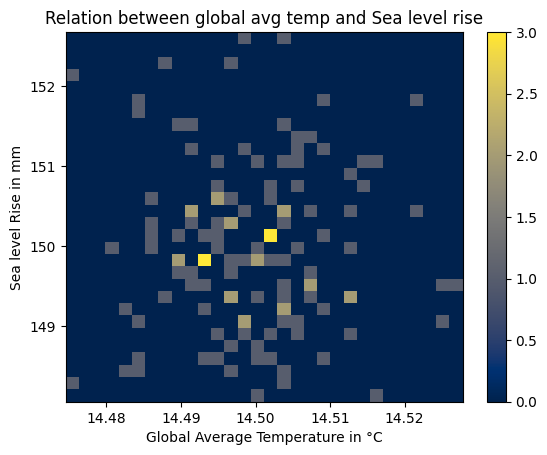

In [18]:
plt.hist2d(dfagg['Global Average Temperature (°C)'],dfagg['Sea Level Rise (mm)'],bins=(30,30),cmap='cividis')
plt.colorbar()
plt.xlabel('Global Average Temperature in °C')
plt.ylabel('Sea level Rise in mm')
plt.title('Relation between global avg temp and Sea level rise')
plt.show()

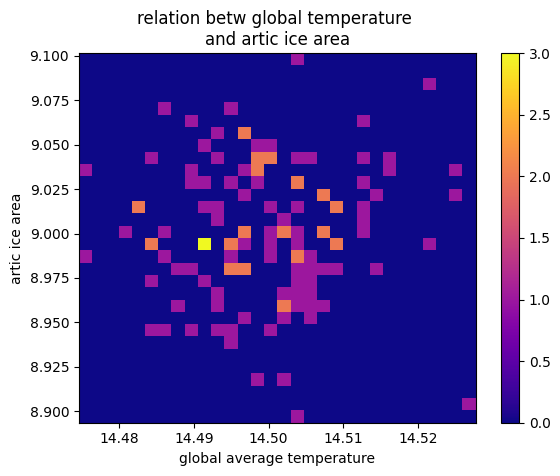

In [20]:
plt.hist2d(dfagg['Global Average Temperature (°C)'],dfagg['Arctic Ice Area (million km²)'],bins=(30,30),cmap='plasma')
plt.colorbar()
plt.title('relation betw global temperature \nand artic ice area')
plt.xlabel('global average temperature')
plt.ylabel('artic ice area')
plt.show()


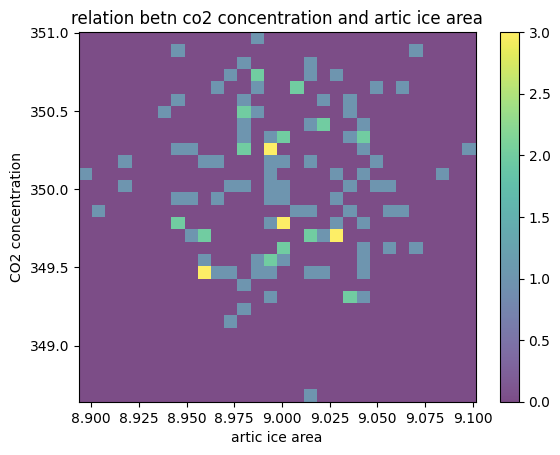

In [22]:
plt.hist2d(dfagg['Arctic Ice Area (million km²)'],dfagg['CO2 Concentration (ppm)'],bins=(30,30),alpha=0.7,cmap="viridis")
plt.colorbar()
plt.title('relation betn co2 concentration and artic ice area')
plt.xlabel('artic ice area')
plt.ylabel('CO2 concentration')
plt.show()

In [24]:
!pip install scipy

In [25]:
from scipy import stats

# Define variable names
a = 'Global Average Temperature (°C)'
b = 'CO2 Concentration (ppm)'
c = 'Sea Level Rise (mm)'
d = 'Arctic Ice Area (million km²)'

# Calculate Pearson correlation
rel_temp_co2 = stats.pearsonr(dfagg[a], dfagg[b])
rel_temp_sea = stats.pearsonr(dfagg[a], dfagg[c])
rel_temp_ice = stats.pearsonr(dfagg[a], dfagg[d])
rel_co2_ice = stats.pearsonr(dfagg[b], dfagg[d])

# Print formatted results
print(f"Correlation between {a} and {b}:")
print(f"  Pearson's r: {rel_temp_co2.statistic:.4f}, p-value: {rel_temp_co2.pvalue:.4f}\n")

print(f"Correlation between {a} and {c}:")
print(f"  Pearson's r: {rel_temp_sea.statistic:.4f}, p-value: {rel_temp_sea.pvalue:.4f}\n")

print(f"Correlation between {a} and {d}:")
print(f"  Pearson's r: {rel_temp_ice.statistic:.4f}, p-value: {rel_temp_ice.pvalue:.4f}\n")

print(f"Correlation between {b} and {d}:")
print(f"  Pearson's r: {rel_co2_ice.statistic:.4f}, p-value: {rel_co2_ice.pvalue:.4f}\n")


Correlation between Global Average Temperature (°C) and CO2 Concentration (ppm):
  Pearson's r: -0.0680, p-value: 0.4531

Correlation between Global Average Temperature (°C) and Sea Level Rise (mm):
  Pearson's r: 0.0039, p-value: 0.9659

Correlation between Global Average Temperature (°C) and Arctic Ice Area (million km²):
  Pearson's r: 0.0470, p-value: 0.6040

Correlation between CO2 Concentration (ppm) and Arctic Ice Area (million km²):
  Pearson's r: 0.0100, p-value: 0.9124



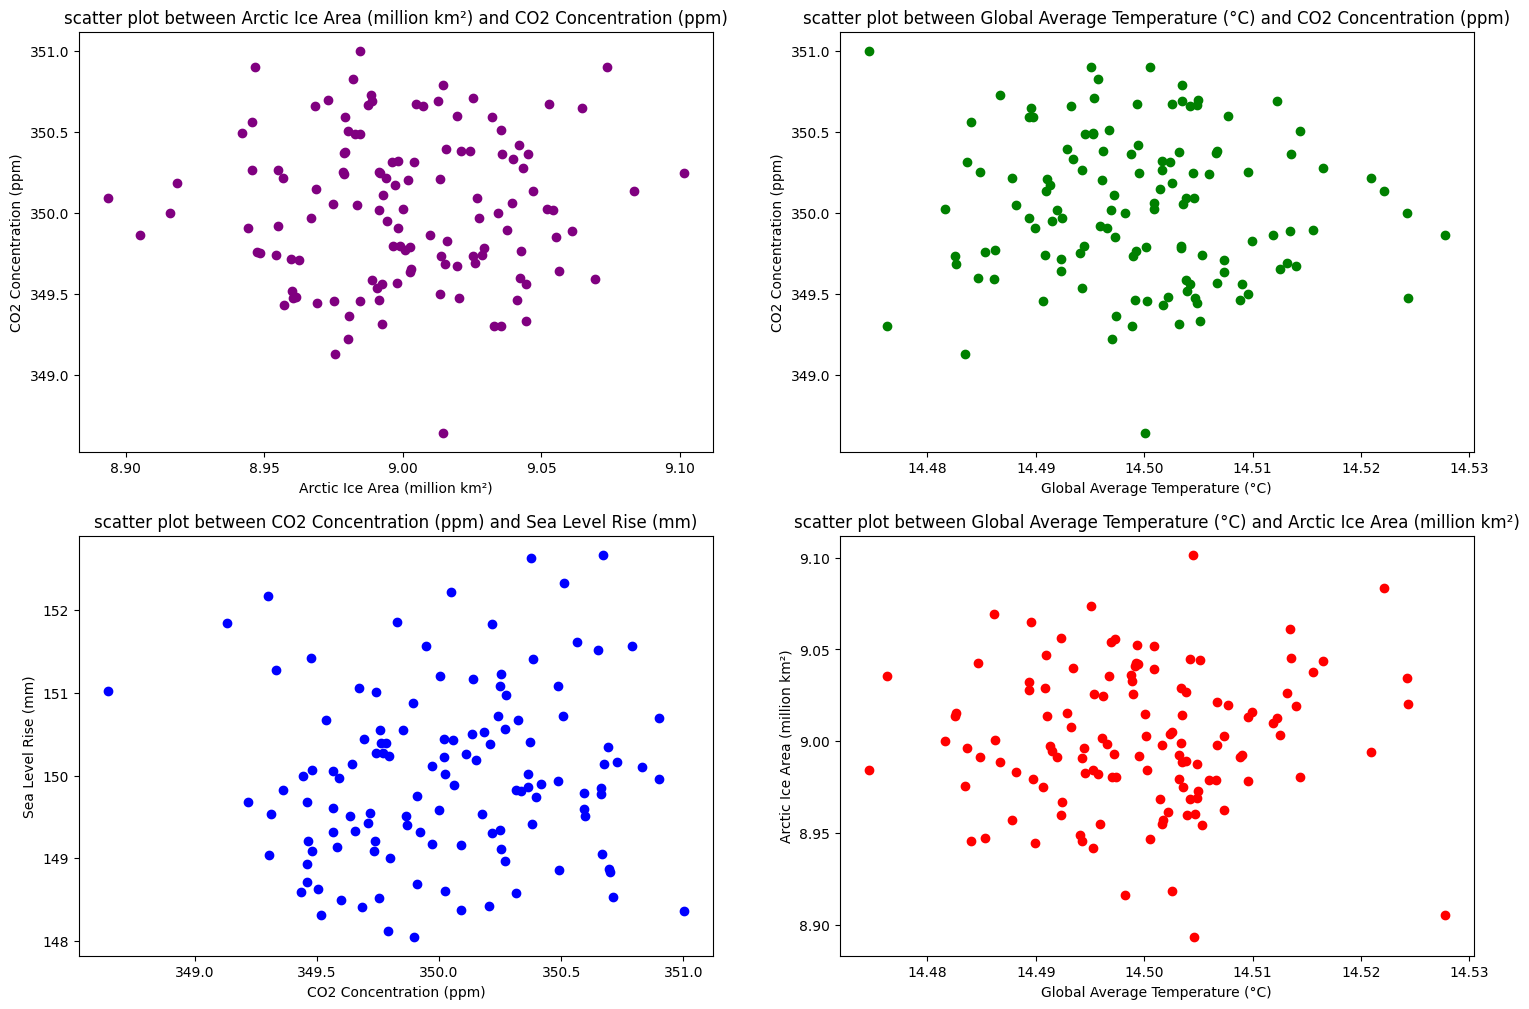

In [26]:
#creating scatter sub plots 
fig, axis=plt.subplots(2,2,figsize=(18,12))

axis[0,0].scatter(data=dfagg,x=d,y=b,color='purple')
axis[0,0].set_title(f"scatter plot between {d} and {b}")
axis[0,0].set_xlabel(d)
axis[0,0].set_ylabel(b)

axis[0,1].scatter(data=dfagg,x=a,y=b,color='green')
axis[0,1].set_title(f"scatter plot between {a} and {b}")
axis[0,1].set_xlabel(a)
axis[0,1].set_ylabel(b)

axis[1,0].scatter(data=dfagg,x=b,y=c,color='blue')
axis[1,0].set_title(f"scatter plot between {b} and {c}")
axis[1,0].set_xlabel(b)
axis[1,0].set_ylabel(c)

axis[1,1].scatter(data=dfagg,x=a,y=d,color='red')
axis[1,1].set_title(f"scatter plot between {a} and {d}")
axis[1,1].set_xlabel(a)
axis[1,1].set_ylabel(d)

plt.show()

### 4) Multivariate analysis

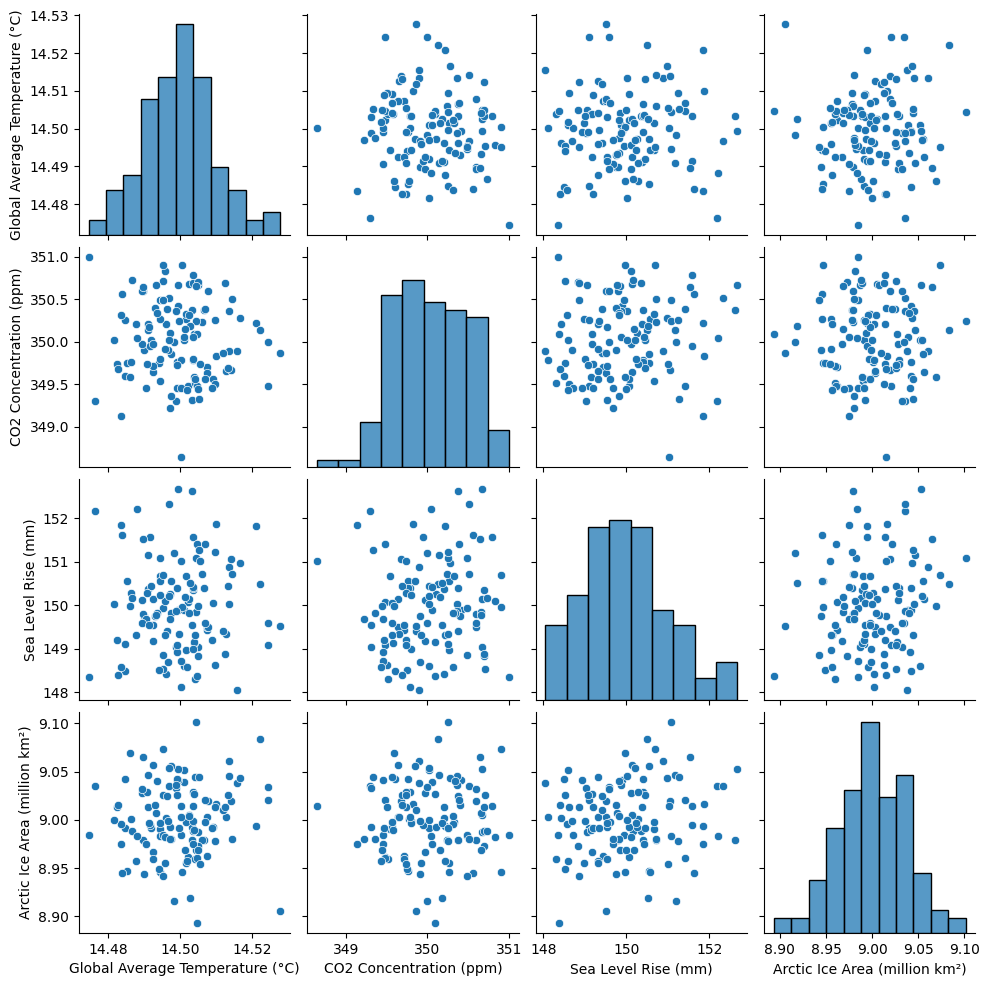

In [28]:
#pairplot analysis of various climate variables
sns.pairplot(dfagg)
plt.show()

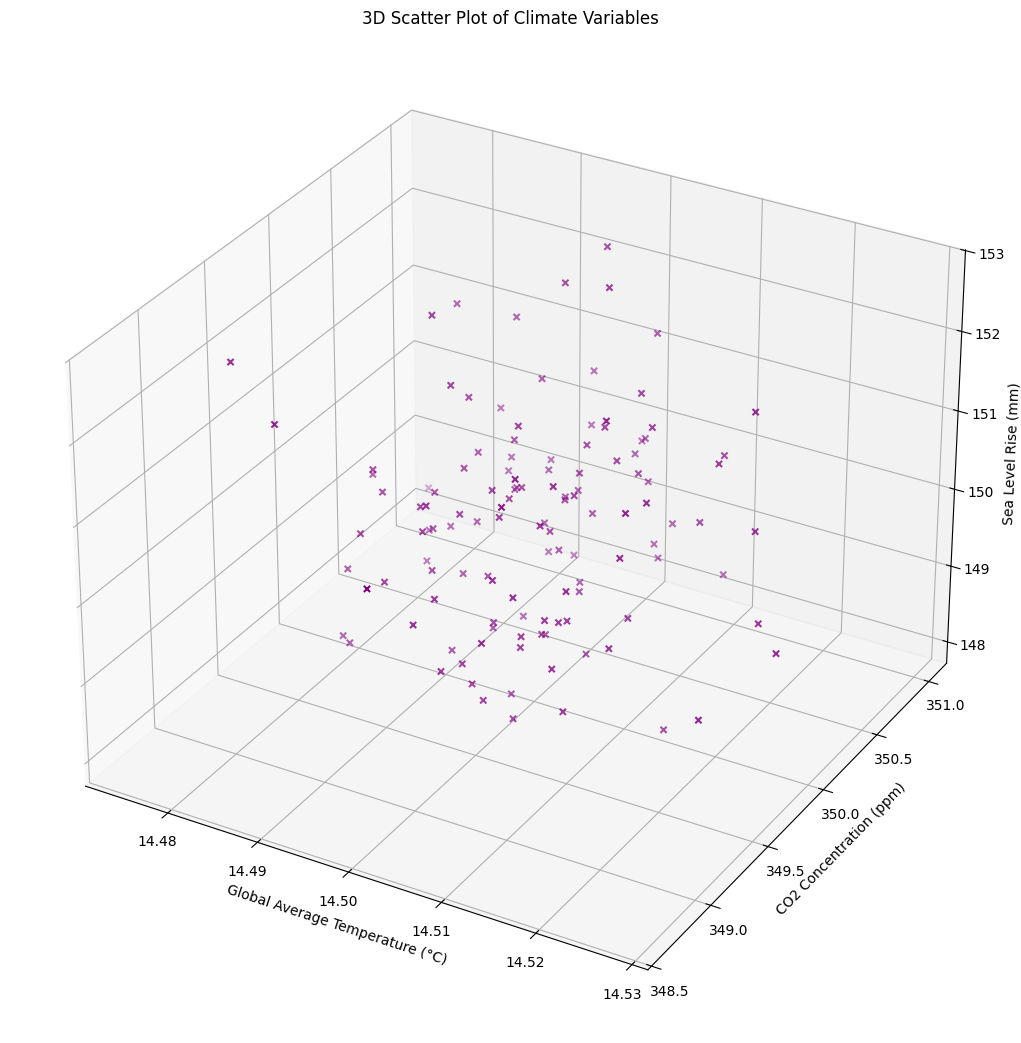

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(dfagg['Global Average Temperature (°C)'], dfagg['CO2 Concentration (ppm)'], dfagg['Sea Level Rise (mm)'],c='purple', marker='x')


ax.set_xlabel('Global Average Temperature (°C)')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_zlabel('Sea Level Rise (mm)')
ax.set_title('3D Scatter Plot of Climate Variables')

plt.show()


# FROM pearsonr analysis : 

### These results suggest that there is no strong or statistically significant correlation between the variables analyzed. Here's a breakdown:

## Climate variables correlation analysis : 

### Global Temperature vs. CO₂ Concentration

- r=−0.0680, p=0.4531
- Weak negative correlation, not statistically significant.


### Global Temperature vs. Sea Level Rise

- r=0.0039, 𝑝=0.9659
- Essentially no correlation and not significant.


### Global Temperature vs. Arctic Ice Area

- 𝑟=0.0470,𝑝=0.6040
- Weak positive correlation, not significant.

### CO₂ Concentration vs. Arctic Ice Area

- 𝑟=0.0100,𝑝=0.9124
- Almost no correlation and not significant.


### Conclusion:
- These results indicate that no meaningful linear relationship exists between these climate variables in given dataset. However, real-world climate relationships are often nonlinear and influenced by other confounding factors.


# From Heat map analysis of all climate variables

## Key Observations:
- Diagonal values (1.0) are expected since each variable perfectly correlates with itself.
- Weak or no correlation: Many of the correlations were much weaker than expected, which is surprising given what we know about climate change.
  
## What We Found:

### Global Temperature vs CO2 Concentration (-0.068):

- There’s a weak negative correlation here, which is odd. Normally, we'd expect CO2 levels to drive up temperatures, not the other way around. This may be because the dataset doesn’t capture all the complexities, like delayed effects.

### Global Temperature vs Sea Level Rise (0.0039):

- The correlation here is almost nonexistent. we had expected rising temperatures to lead to higher sea levels, but this weak correlation could suggest that the data is too short-term, or it isn’t capturing long-term trends properly.

### Global Temperature vs Arctic Ice Area (0.047):

- This one shows a very weak positive correlation, which is surprising. We typically expect a negative correlation (higher temperatures lead to less ice), so this points to potential issues with the dataset

### CO2 Concentration vs Sea Level Rise (0.098):

- This shows a weak positive correlation, which is a bit surprising. We usually think of rising CO2 levels as a major driver of sea level rise, but here the connection seems pretty weak.

### CO2 Concentration vs Arctic Ice Area (0.01):

- Almost no correlation here either. You’d expect higher CO2 levels to melt more ice, so this suggests there could be missing factors or that the dataset doesn’t capture everything that’s happening in the Arctic.

### Sea Level Rise vs Arctic Ice Area (0.13):

- A weak positive correlation, which is odd since melting Arctic ice should contribute to sea level rise. However, since Arctic ice is floating, its melting doesn’t have the same direct impact on sea levels as ice on land would.

  
# Final Thoughts:
- Overall, the weak or unexpected correlations in this analysis could mean a few things:  
## - Data Limitations: 
- The dataset might be too short or not detailed enough, missing important factors like feedback loops or long-term effects.  
## -Complex Climate Interactions:
- Climate variables are interconnected in complex ways that simple correlation might not fully capture.

  
### In the end, a more detailed and comprehensive dataset and includes more variables would likely provide clearer and more reliable insights.